# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.metrics import recall_score, roc_auc_score, roc_curve

# Описание данных, цель работы

In [ ]:
!gdown --id 1PYzV1fN-YxipfZSmilMX8-JAi_zJbY6B

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PYzV1fN-YxipfZSmilMX8-JAi_zJbY6B
To: /content/stroke_data.csv
100% 1.37M/1.37M [00:00<00:00, 69.1MB/s]


**Источник**: [kaggle.com](https://www.kaggle.com/datasets/prosperchuks/health-dataset)
<br>Используемый датасет был предварительно очищен, данные были аугментированы, а классы сбалансированы (по описанию на kaggle.com)
<br>**Описание**: датасет содержит информацию о пациентах, а также был ли у них инсульт или нет.
*   ***sex***: пол (1 - мужской, 0 - женский)
*   ***age***: возраст (в годах)
*   ***hypertension***: высокое давление (1 - когда-либо было, 0 - не было)
*   ***heart_disease***: заболевания сердца (1 - когда-либо было, 0 - не было)
*   ***ever_married***: женат/замужем (1 - да, 0 - нет)
*   ***work_type***: занятость (0 - никогда не работал, 1 - уход за детьми, 2 - работа в Гос.органах, 3 - самозанятый (работа на себя), 4 - работа в негос. организациях)
*   ***Residence_type***: место проживания (1 - город, 0 - сельская местность)
*   ***avg_glucose_level***: среднее содержание сахара в крови (в мг в 100 мл крови)
*   ***bmi***: индекс массы тела (вес в кг, поделенный на рост в м в квадрате)
*   ***Smoking_status***: статус курильщика (1 - курит, 0 - никогда не курил)
*   ***stroke***: инсульт (1 - да, 0 - нет; целевая переменная)

***Цель***: разработать продукт, помогающий терапевтам выявить риск развития инсульта у пациентов до проведения дополнительной диагностики (кроме того, данным продуктом могли бы пользоваться люди без мед образования для самодиагностики)

In [ ]:
df = pd.read_csv('stroke_data.csv')
df.shape

(40910, 11)

In [ ]:
df.sample(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6776,1.0,84.0,1,0,1,2,1,213.03,20.2,1,1
707,0.0,59.0,0,0,1,4,0,76.46,21.2,1,1
7316,0.0,50.0,0,0,1,4,0,197.28,34.5,1,1
21317,0.0,67.0,0,0,1,2,0,89.11,24.4,0,0
21318,1.0,31.0,0,0,1,2,0,58.30,20.4,0,0
32500,1.0,29.0,1,0,1,4,1,221.83,35.1,1,0
11544,0.0,48.0,0,0,1,4,1,171.23,34.4,1,1
8928,1.0,80.0,0,0,1,3,1,76.57,34.1,0,1
15314,0.0,64.0,0,1,1,4,0,127.29,27.7,0,1
25001,0.0,29.0,0,0,1,4,1,85.84,37.3,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [ ]:
df[df.sex.isna()]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22478,NaN,39.0,0,0,1,4,1,70.56,28.6,1,0
28908,NaN,36.0,0,0,1,4,1,70.56,28.6,1,0
35184,NaN,77.0,0,0,1,4,1,70.56,28.6,1,0


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(40907, 11)

In [ ]:
df.duplicated().sum()

0

**Выводы:**
*   датасет содержит 10 признаков и одну целевую переменную;
*   категориальные признаки и целевая переменная представлены в цифровом формате (с расшифровкой автора);
*   из датасета были исключены 3 наблюдения, по которым отсутствовала информация по полу пациентов;
*   дубликатов не обнаружено;
*   количество наблюдений - 40907.

# Анализ данных

In [ ]:
# Числовые признаки
num_cols = [
    'age',
    'avg_glucose_level',
    'bmi'
]

# Категориальные признаки
cat_cols = [
    'sex',
    'hypertension',
    'heart_disease',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status'
]

feature_cols = num_cols + cat_cols
target_col = 'stroke'

## Анализ количественных признаков

In [ ]:
df[num_cols].describe()

,age,avg_glucose_level,bmi
count,40907.000000,40907.000000,40907.000000
mean,51.327303,122.079679,30.406488
std,21.624171,57.561951,6.835305
min,-9.000000,55.120000,11.500000
25%,35.000000,78.750000,25.900000
50%,52.000000,97.920000,29.400000
75%,68.000000,167.590000,34.100000
max,103.000000,271.740000,92.000000


Аномальное минимальное значение по признаку age!
<br>Максимальное значение также вызывает подозрения, но все же возможно.

In [ ]:
df[df.age<0]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9149,1.0,-2.0,1,1,1,4,0,271.74,31.1,1,1
9277,1.0,-5.0,0,0,1,4,0,97.92,26.9,1,1
9323,1.0,-4.0,1,1,0,4,0,84.03,26.5,1,1
9487,1.0,-3.0,0,0,1,4,0,224.10,56.6,0,1
9505,1.0,-1.0,1,0,0,4,1,203.87,45.7,0,1
9708,1.0,-5.0,1,0,1,4,0,179.12,28.1,1,1
9808,1.0,-3.0,0,1,1,3,1,252.72,30.5,1,1
9936,1.0,-1.0,1,0,1,4,0,58.09,39.2,1,1
10175,1.0,-2.0,1,0,1,3,0,72.67,28.9,0,1
10278,1.0,-1.0,1,0,1,4,0,243.58,33.6,0,1


In [ ]:
df[(df.age<7)&(df.smoking_status==1)]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
320,1.0,5.0,0,0,1,4,0,97.92,26.9,1,1
386,1.0,6.0,1,1,0,4,0,84.03,26.5,1,1
938,1.0,5.0,1,0,1,4,0,179.12,28.1,1,1
2104,1.0,6.0,0,0,1,4,1,86.23,30.0,1,1
3753,1.0,4.0,0,1,1,2,0,120.46,36.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...
32133,1.0,4.0,1,1,1,2,0,83.61,21.4,1,0
35479,1.0,5.0,1,0,1,4,1,108.61,38.1,1,0
40007,1.0,5.0,1,0,0,4,1,73.00,25.2,1,0
40022,1.0,5.0,0,0,0,4,0,117.45,30.7,1,0


In [ ]:
df[df.age<18]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
45,1.0,13.0,1,0,1,4,0,74.90,22.2,0,1
48,1.0,17.0,1,0,0,4,1,113.01,24.0,0,1
51,1.0,11.0,1,0,1,3,0,72.67,28.9,0,1
63,1.0,17.0,0,1,1,4,0,59.35,32.3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40708,1.0,15.0,0,0,1,4,0,83.53,48.5,1,0
40712,1.0,13.0,0,1,1,4,0,82.89,29.5,0,0
40723,0.0,17.0,0,0,1,4,0,95.36,21.5,1,0
40741,1.0,15.0,0,0,0,2,0,79.59,31.4,1,0


**Выводы:** в результате обзора данных, было выявлено, что есть аномальные значения по признаку age (отрицательные значения), также возникли сомнения по поводу корректности заполненных данных у пациентов детского возраста (положительный статус курильщика).
<br>Учитывая, что целевой аудиторией для использования продукта являются совершеннолетние пациенты, то следует исключить пациентов моложе 18 лет (для детей было бы интересно создать продукт, позволяющий оценить риск развития таких заболеваний, как инсульт или диабет, в рамках неонотального скрининга, основываясь на генетике, истории заболеваний в семье, а также истории вынашивания и родов).

In [ ]:
df = df[df.age>=18]
df.reset_index(inplace=True)
df.shape

(38309, 12)

In [ ]:
df[num_cols].describe()

,age,avg_glucose_level,bmi
count,38309.000000,38309.000000,38309.000000
mean,54.027774,121.897542,30.415059
std,19.568435,57.410523,6.841674
min,18.000000,55.120000,11.500000
25%,38.000000,78.780000,25.900000
50%,54.000000,97.920000,29.400000
75%,69.000000,167.410000,34.100000
max,103.000000,271.740000,92.000000


**Выводы:** в результате фильтрации таблицы осталось 38309 наблюдений.
<br>По уровню сахара в крови и индексу массы тела пределы значений допустимые.

<ipython-input-19-9c8ddd3483bf>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)


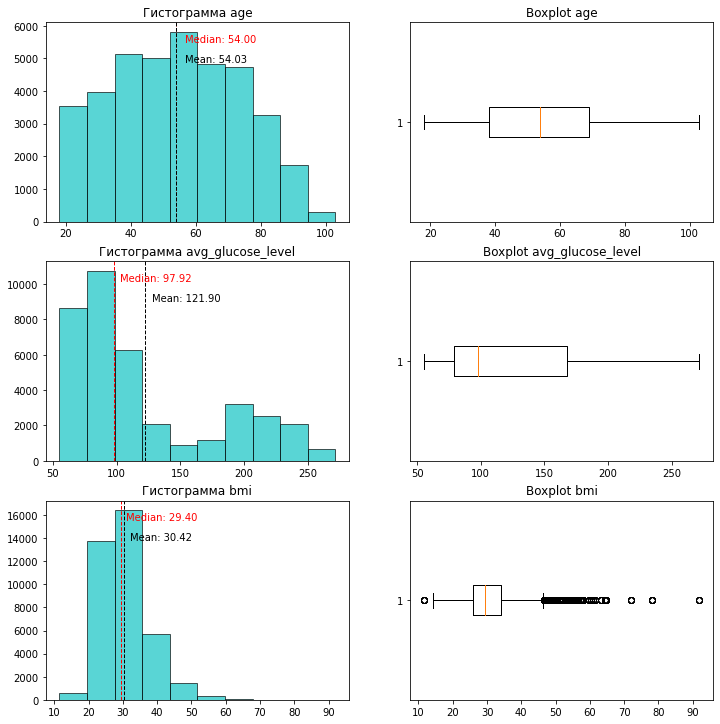

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.tight_layout()
i = 1
for col in num_cols:
  plt.subplot(3, 2, i)
  plt.hist(df[col], color='c', edgecolor='k', alpha=0.65)
  plt.axvline(df[col].median(), color='r', linestyle='dashed', linewidth=1)
  plt.axvline(df[col].mean(), color='k', linestyle='dashed', linewidth=1)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[col].median()*1.05, max_ylim*0.9, 'Median: {:.2f}'.format(df[col].median()), color='r')
  plt.text(df[col].mean()*1.05, max_ylim*0.8, 'Mean: {:.2f}'.format(df[col].mean()))
  plt.title('Гистограмма ' + col)

  plt.subplot(3, 2, i+1)
  plt.boxplot(df[col], vert=False)
  plt.title('Boxplot ' + col)

  i+=2
plt.show()

**Выводы:**
1. По age диаграмма чуть сдвинута вправо (если бы сохранили детский возраст, то, возможно, распределение было бы похоже на нормальное). Размах от 18 лет до 103 лет. Среднее и медианное значения почти совпадают и составляют 54 года.
2. По avg_glucose_level	размах составляет от 55.12мг до 271.74мг. Распределение заметно перекошено вправо. Медианное значение составляет 97.92 мг на 100 л крови, что практически соответсвует верхней границе нормы в 99 мг, т.е. уровень сахара в крови у пациентов в среднем практически находится на референсной отметке. Среднее значение выше медианного в 1.24 раза и составляет 121.90 мг (состояние предиабета), что говорит о наличии пациентов с аномально высокими значениями показателя (страдающих диабетом).
3. По bmi размах составляет от 11.5 до 92.0. Распределение скошено вправо (среднее немного выше медианы). Медианное значение составляет 29.4: в среднем пациенты страдают избыточной массой тела (предожирением). Среднее значение в 30.42 уже говорит о перекосе в сторону пациентов с ожирением той или иной степени. Также на боксплоте виден выброс слева (пациент с дефицитной массой тела), а также значительное количество выбросов справа (пациентов с ожирением 3 степени).


## Анализ категориальных признаков

<ipython-input-20-99a04ea51bde>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i)


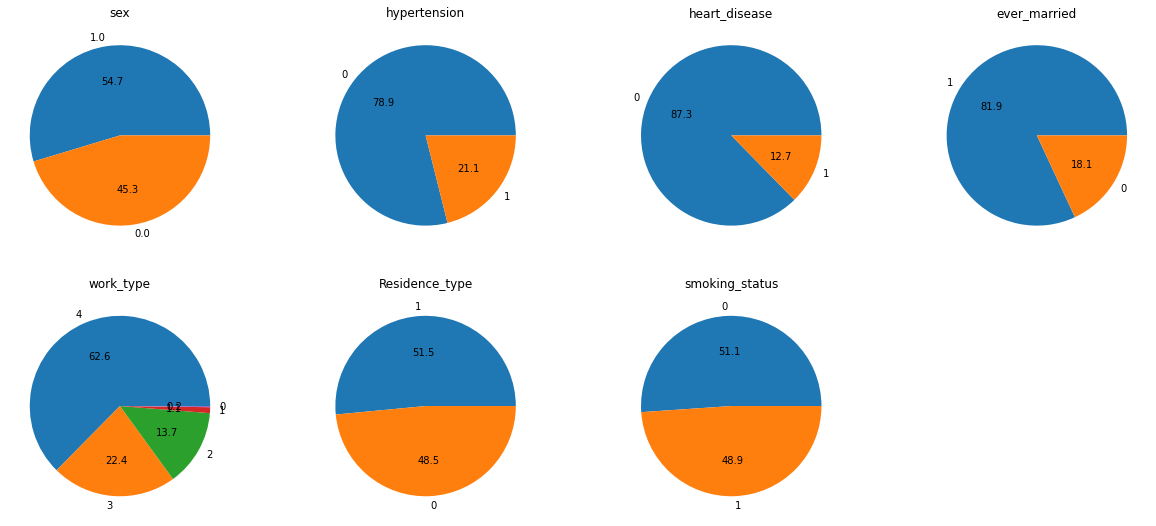

In [ ]:
fig, ax = plt.subplots(figsize=(17, 15))
fig.tight_layout()
i = 1
for col in cat_cols:
  plt.subplot(4, 4, i)
  x = df[col].value_counts()
  plt.pie(x, labels= x.index, autopct='%.1f')
  plt.title(col)

  i+=1
plt.show()

**Выводы:**
1. По sex распределение практически равное (мужчин чуть больше, чем женщин).
2. По hypertension больше трети пациентов не страдают высоким давлением.
3. По heart_desease только 12.7% пациентов имеют проблемы с сердцем.
4. По work_type большая часть пациентов (62.6%) работает в негос.организациях, 22.4% - работают на себя, 13.7% - работают в гос.органах. Остальные пациенты - либо ухаживают за детьми, либо не работают.
5. По Residence_type распределение практически равное (чуть больше пациентов проживает в городской местности).
6. По smoking_status распределение практически равное (чуть больше некурящих пациентов).
<br> Важно посмотреть не просто на распределение каждого признака, а на его распределение в разрезе классов целевой переменной.

## Анализ целевой переменной и признаков в зависимости от класса целевой переменной

In [ ]:
stroke = df.stroke.value_counts()

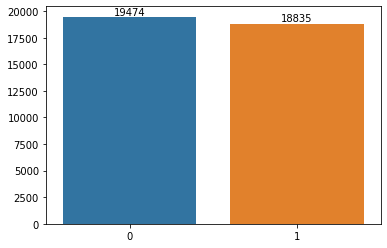

In [ ]:
ax = sns.barplot(x=stroke.index, y=stroke.values)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Выводы:**
<br>По целевому признаку stroke классы являются сбалансированными. Пациентов, у которых не было инсульта, чуть больше.

<ipython-input-23-ad6e7566ac95>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i)


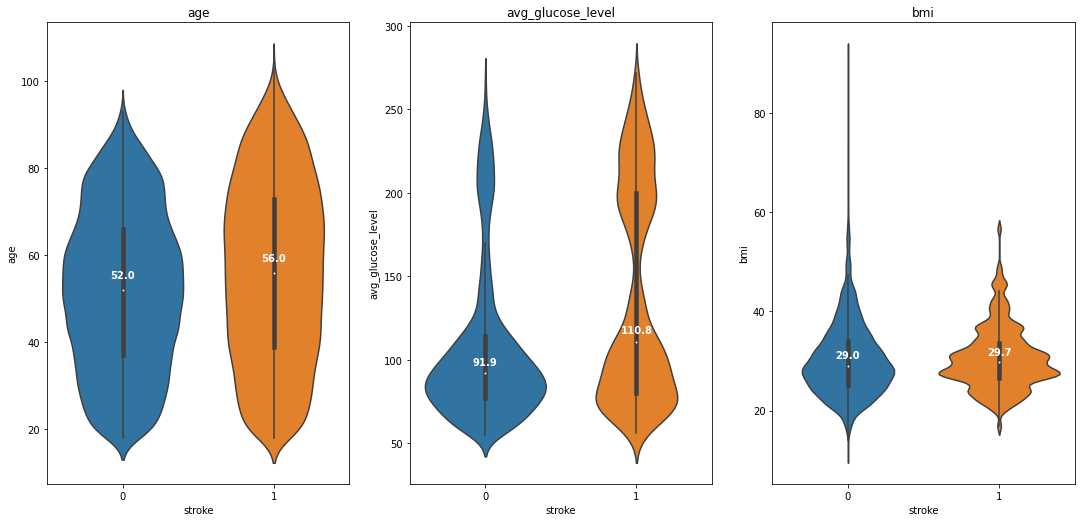

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()
i = 1
for col in num_cols:
  plt.subplot(1, 3, i)
  v_plot = sns.violinplot(x='stroke', y=col, data=df)
  medians = round(df.groupby(['stroke'])[col].median(), 1)
  vertical_offset = df[col].median() * 0.05 # offset from median for display

  for xtick in v_plot.get_xticks():
      v_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
              horizontalalignment='center',color='w',weight='semibold')
  plt.title(col)

  i+=1
plt.show()

**Выводы:** 
1. Признак age распределен примерно одинаково по классам, медианы примерно на одном уровне. Можно предположить, что возраст не влияет на возможность инсульта.
2. По признаку avg_glucose_level у пациентов, переживших инсульт, медианное значение сахара на предиабетном уровне, а также заметно больше пациентов с инсультом имеют сахарный диабет. У пациентов, у которых не было инсульта, медианное значение на нормальном уровне сахара, и заметно меньше пациентов с диабетом. Можно предположить, что наличие предиабета и диабета влияет на развитие инсульта.
3. По признаку bmi медианные значения у обоих классов приблизительно на одном уровне. Можно предположить, что индекс массы тела не влияет на возможность инсульта.

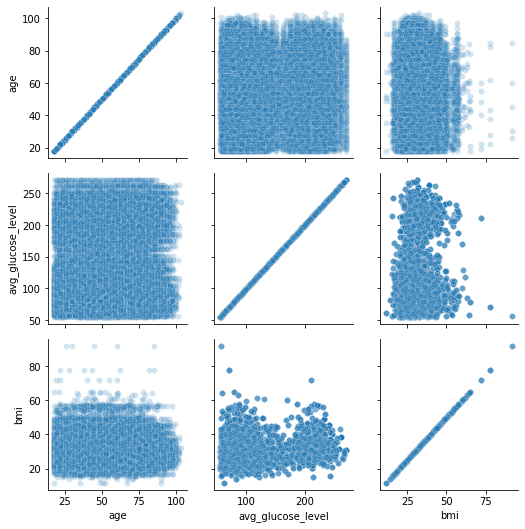

In [ ]:
g = sns.PairGrid(df[num_cols])
g.map(sns.scatterplot, alpha=0.2)
plt.show()

**Выводы:** линейной зависимости между признаками не прослеживается.

In [ ]:
# функция для добавления значений на столбчатые диаграммы в процентах
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

<ipython-input-26-3cf8b04b36af>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 2, i)


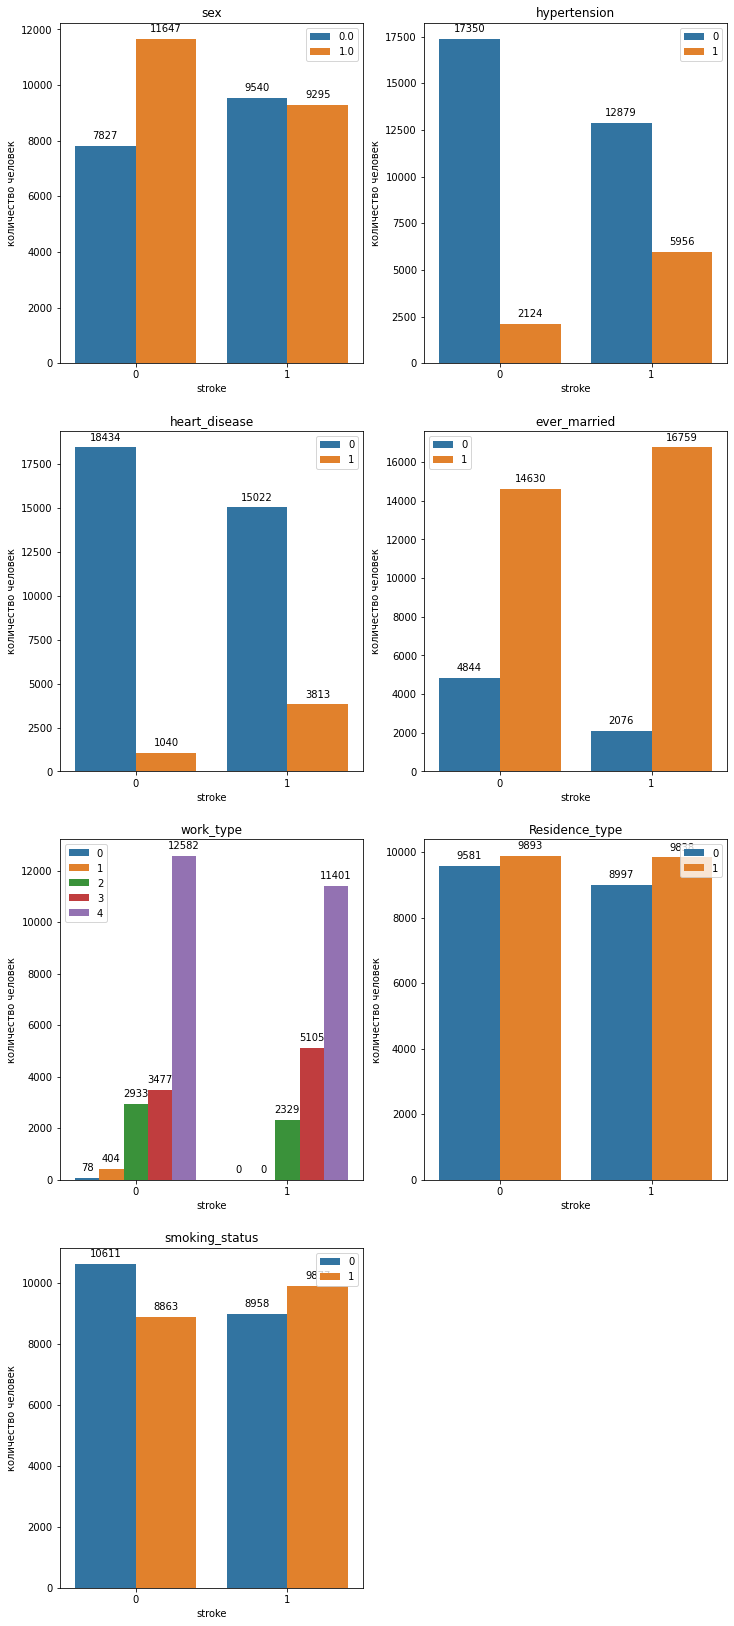

In [ ]:
fig, ax = plt.subplots(figsize=(10, 45))
fig.tight_layout()
i = 1
for col in cat_cols:
  df1 = pd.crosstab(df['stroke'], df[col])
  stacked = df1.stack().reset_index().rename(columns={0:'value'})
  plt.subplot(8, 2, i)
  sns.barplot(x=stacked.stroke, y=stacked.value, hue=stacked[col])
  plt.ylabel('количество человек')
  plt.legend()

  ax = plt.gca()
  add_value_labels(ax)
  plt.title(col)

  i+=1
plt.show()

**Выводы:** 
1. По признаку sex среди пациентов, переживших инсульт, женщин чуть больше, чем мужчин. У пациентов, у которых не было инсульта, мужчин заметно больше, чем женщин.
2. По признаку hypertension у пациентов, переживших инсульт, чаще наблюдалось высокое давление, чем у пациентов, у которых не было инсульта. Можно предположить, что высокое давление (либо его вызывающие причины) провоцируют инсульт.
3. По признаку heart_desease ситуация, аналогичная признаку hypertension.
4. По признаку ever_married большая часть пациентов имела статус женатых/замужних независимо от класса. Среди пациентов, переживших инсульт, больше женатых/заамужних, чем среди пациентов, у которых не было инсульта.
5. По признаку work_type распределения похожи для обоих классов. Среди пациентов, переживших инсульт, отсутствуют ухаживающие за детьми и безработные.
6. По признаку Residence_type распределения схожи для обоих классов. Живущих в сельской местности чуть меньше, чем в городской.
7. По признаку smoking_status среди пациентов, переживших инсульт, больше курильщиков, чем некурящих. Обратная ситуация для пациентов, у которых не было инсульта.

## Анализ взаимосвязи признаков

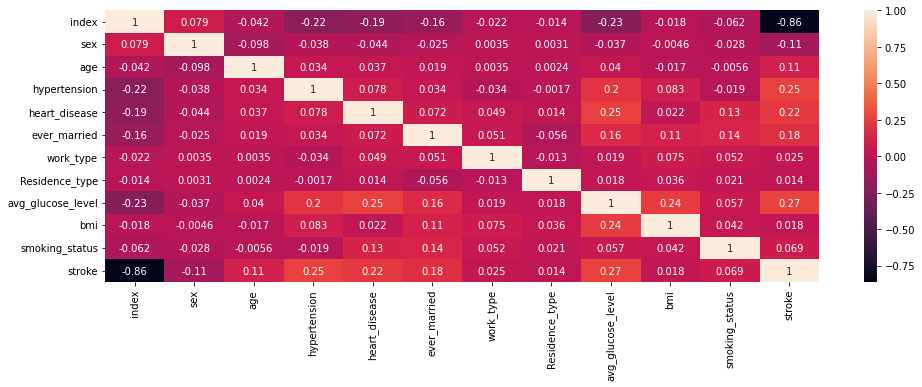

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Выводы:** мультиколлинеарности среди признаков не обнаружено.

# Выбор метрики

В поставленной задаче важно идентифицировать как можно больше пациентов, у которых случился инсульт. Ложное присвоение метки пациентам, у которых не было инсульта, не так критично. Т.е. необходимо определить ***вероятность выявления заболевания*** и попытаться ее максимизировать.
<br>В качестве ML-метрики для данной задачи целесообразно выбрать ***recall (полноту)***. Чем выше значение метрики, тем выше вероятность выявления заболевания, т.е. тем меньше положительных примеров модель пропустит при классификации. Также стоит обратить внимание на ***ROC-кривую и метрику ROC-AUC*** для оценки общей эффективности модели (чем выше ROC-AUC, тем лучше).

# Моделирование

In [ ]:
seed = 17

In [ ]:
# деление выборки на test (20%) и train (80%)
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], 
                                                       train_size=0.8, 
                                                       random_state=seed)

## Baseline (Logistic Regression)

В качестве базовой модели используем ***LogisticRegression*** с учетом перебора значений гиперпараметра C, а также валидации на 5 фолдах с помощью GridSearchCV. 
<br>В Pipeline добавим нормировку числовых признаков с помощью StandartScaler, а также предобработку категориальных признаков с помощью OneHotEncoder.
<br>В качестве скоринга используем метрику recall.

In [ ]:
# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(StandardScaler())

# конвейер подготовки данных категориального типа
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_cols),
        ('ohe',
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            cat_cols
        )
    ],
    verbose_feature_names_out = False,
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', LogisticRegression(random_state=seed)) # алгоритм
])

In [ ]:
parameters = {
    # название этпапа подготовки__гиперпараметр: [сетка (список) параметров]
    'alg__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

In [ ]:
# сетка гиперпараметров
gs = GridSearchCV(alg, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  scoring='recall',
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=-1) # параллелизм вычислений

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'alg__C': 100}

In [ ]:
gs.cv_results_

{'mean_fit_time': array([0.1699369 , 0.1789968 , 0.29106617, 0.2091042 , 0.30559559,
        0.12535291]),
 'std_fit_time': array([0.05038933, 0.03135176, 0.05768417, 0.0520952 , 0.05296603,
        0.0372294 ]),
 'mean_score_time': array([0.01997695, 0.0218008 , 0.02649674, 0.0318368 , 0.03469682,
        0.02318177]),
 'std_score_time': array([0.0072258 , 0.00589541, 0.01016553, 0.00746254, 0.00762771,
        0.01161762]),
 'param_alg__C': masked_array(data=[100, 10, 1, 0.1, 0.01, 0.001],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alg__C': 100},
  {'alg__C': 10},
  {'alg__C': 1},
  {'alg__C': 0.1},
  {'alg__C': 0.01},
  {'alg__C': 0.001}],
 'split0_test_score': array([0.62648613, 0.62648613, 0.62582563, 0.62681638, 0.62813738,
        0.61988111]),
 'split1_test_score': array([0.62702346, 0.62702346, 0.6266931 , 0.62603238, 0.6266931 ,
        0.6266931 ]),
 'split2_test_score': array([0.6382557 , 

In [ ]:
gs.best_score_

0.6299553031959393

**Выводы:** Модель отработала с эффективностью по recall в 0.63, что достаточно неплохо. Лучший результат показала при использовании гиперпараметра C = 100.

Рассчитаем показатели эффективности работы модели на тестовой выборке.

In [ ]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

In [ ]:
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
f'Recall на train: {round(train_recall, 4)}, Recall на test: {round(test_recall, 4)}'

'Recall на train: 0.6301, Recall на test: 0.6442'

In [ ]:
y_train_predicted = gs.predict_proba(X_train)[:, 1]
y_test_predicted = gs.predict_proba(X_test)[:, 1]

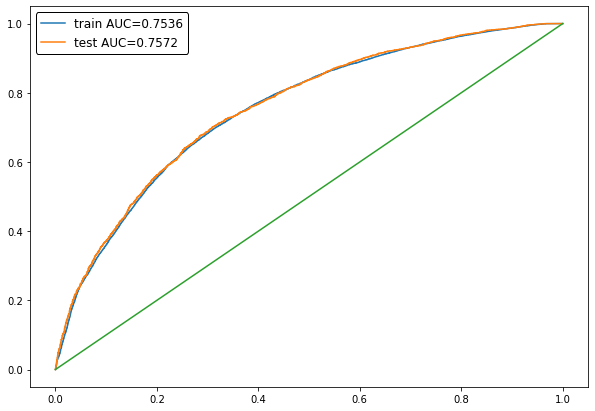

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

**Выводы:** 
1. По метрике Recall модель логистической регрессии показала неплохие результаты (0.63 на train и 0.64 на test).
2. По метрике ROC-AUC модель также показала неплохие результаты (0.7536 на train и 0.7572 на test).
3. Нет признаков недообучения или переобучения модели.
4. Следует оценить влияние признаков на целевую переменную (возможно, что-то исключить или трансформировать).
5. Следует попробовать ансамблевые модели, а также градиентный бустинг с автоподбором параметра в целях максимизации вероятности выявления инсульта у пациентов.

# Тестирование различных моделей

Поскольку задача является стандартной в плане выбора того или иного значения признака, а в конечном итоге присвоение одного из бинарных классов, то в первую очередь, следует протестировать классический алгоритм машинного обучения - дерево решений. Также в связи с тем, что модели градиентного бустинга, как правило, показывают достаточно высокие результаты, можно протестировать XGBoost, т.к. она по временным параметрам отрабатывает быстрее, чем другие модели градиентного бустинга. Оптимальные гиперпараметры будем подбирать с помощью GridSearchCV. Ограничимся подбором основного гиперпараметра max_depth для обеих моделей. Для Decision Tree также включим в подбор параметров различные критерии классификации

## Decision Tree

***Decision Tree*** с учетом перебора значений гиперпараметров criterion, max_depth, а также валидации на 5 фолдах с помощью GridSearchCV.
<br>В Pipeline добавим нормировку числовых признаков с помощью StandartScaler. Предобработку категориальных признаков с помощью OneHotEncoder можно опустить, поскольку модель хорошо работает с категориальными признаками.
<br>В качестве скоринга используем метрику recall.

In [ ]:
from sklearn import tree

In [ ]:
# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(StandardScaler())

# конвейер подготовки данных 
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_cols)
    ],
    remainder="passthrough",
    verbose_feature_names_out = False,
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', tree.DecisionTreeClassifier(random_state=seed)) # алгоритм
])

In [ ]:
parameters = {
    # название этапа подготовки__гиперпараметр: [сетка (список) параметров]
    "alg__max_depth": [2,4,6,10,15,20],
    "alg__criterion": ['gini', 'entropy', 'log_loss']
}

In [ ]:
# сетка гиперпараметров
gs = GridSearchCV(alg, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  scoring='recall',
                  return_train_score=True,
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=-1) # параллелизм вычислений

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'alg__criterion': 'gini', 'alg__max_depth': 20}

In [ ]:
gs.cv_results_

{'mean_fit_time': array([0.05478406, 0.06596169, 0.08939142, 0.09843163, 0.09939437,
        0.17695293, 0.0436811 , 0.09087501, 0.10426602, 0.14863539,
        0.21139536, 0.14619389, 0.03027611, 0.04510975, 0.05766621,
        0.08031993, 0.10440893, 0.11282101]),
 'std_fit_time': array([0.02016295, 0.01424733, 0.0300648 , 0.02581006, 0.00232656,
        0.0407372 , 0.01257585, 0.00603284, 0.02469752, 0.0216631 ,
        0.01073531, 0.049872  , 0.00140393, 0.00093807, 0.00199142,
        0.00289942, 0.00504114, 0.00616313]),
 'mean_score_time': array([0.01750917, 0.01810136, 0.01836505, 0.01443048, 0.01098385,
        0.02169151, 0.01755829, 0.02035999, 0.02226815, 0.02056117,
        0.02395411, 0.01571774, 0.01111746, 0.01189156, 0.01427026,
        0.0106916 , 0.01527753, 0.01136394]),
 'std_score_time': array([0.00542954, 0.00664662, 0.00710273, 0.00587938, 0.00055328,
        0.00597419, 0.00622419, 0.00381533, 0.00582869, 0.00313214,
        0.0052087 , 0.00620404, 0.00062459, 

In [ ]:
gs.best_score_

0.9951116307263689

In [ ]:
feat_list = gs.best_estimator_[-2].get_feature_names_out()
feat_list

array(['age', 'avg_glucose_level', 'bmi', 'sex', 'hypertension',
       'heart_disease', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'], dtype=object)

In [ ]:
imp_list = gs.best_estimator_.named_steps["alg"].feature_importances_
imp_list = [round(i, 4) for i in imp_list]
imp_list

[0.0003, 0.4311, 0.3041, 0.0, 0.0428, 0.0257, 0.0456, 0.0794, 0.0243, 0.0468]

In [ ]:
pd.DataFrame(imp_list, index=feat_list, columns=['importance']).sort_values(by='importance', ascending=False)

,importance
avg_glucose_level,0.4311
bmi,0.3041
work_type,0.0794
smoking_status,0.0468
ever_married,0.0456
hypertension,0.0428
heart_disease,0.0257
Residence_type,0.0243
age,0.0003
sex,0.0000


**Выводы:** Модель отработала с эффективностью по recall в 0.9951. Лучший результат показала при использовании гиперпараметров: 'criterion': 'gini', 'max_depth': 20.
<br>Наиболее значимыми признаками оказались уровень сахара и индекс массы тела. Пол и возраст оказались не значимыми признаками.

Рассчитаем показатели эффективности работы модели на тестовой выборке.

In [ ]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

In [ ]:
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
f'Recall на train: {round(train_recall, 4)}, Recall на test: {round(test_recall, 4)}'

'Recall на train: 1.0, Recall на test: 0.9989'

In [ ]:
y_train_predicted = gs.predict_proba(X_train)[:, 1]
y_test_predicted = gs.predict_proba(X_test)[:, 1]

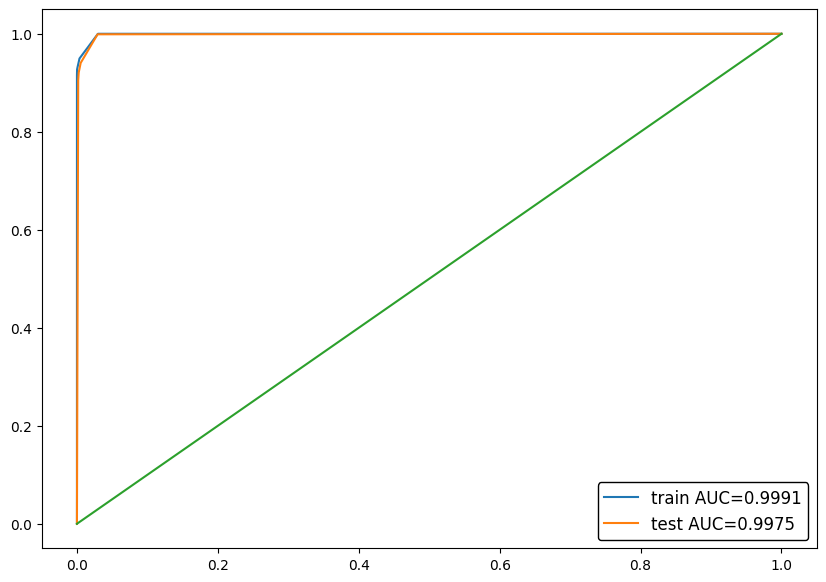

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

**Выводы:** 
1. По метрике Recall модель показала практически идеальные результаты (1.0 на train и 0.9989 на test).
2. По метрике ROC-AUC модель также показала отличные результаты (0.9991 на train и 0.9975 на test).
3. Нет признаков недообучения или переобучения модели.

## XGBoost

***XGBoost*** с учетом перебора значений гиперпараметра max_depth, а также валидации на 5 фолдах с помощью GridSearchCV.
<br>В Pipeline добавим нормировку числовых признаков с помощью StandartScaler, а также предобработку категориальных признаков с помощью OneHotEncoder.
<br>В качестве скоринга используем метрику recall.

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost

In [ ]:
# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(StandardScaler())

# конвейер подготовки данных 
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_cols),
        ('ohe',
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            cat_cols
        )
    ],
    verbose_feature_names_out = False,
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', xgboost.XGBClassifier(random_state=seed)) # алгоритм
])

In [ ]:
parameters = {
    # название этапа подготовки__гиперпараметр: [сетка (список) параметров]
    "alg__max_depth": [2,4,6,10,15,20]
}

In [ ]:
# сетка гиперпараметров
gs = GridSearchCV(alg, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  scoring='recall',
                  return_train_score=True,
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=-1) # параллелизм вычислений

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'alg__max_depth': 6}

In [ ]:
gs.cv_results_

{'mean_fit_time': array([ 2.43818765,  3.78717289,  5.44747972,  9.26122484, 14.52830925,
        15.76264577]),
 'std_fit_time': array([0.74956141, 0.59700276, 0.5640453 , 0.52617208, 0.95550915,
        1.81534484]),
 'mean_score_time': array([0.03704305, 0.04656658, 0.05577073, 0.06652417, 0.14947   ,
        0.11209073]),
 'std_score_time': array([0.0162883 , 0.01997945, 0.01750198, 0.00955784, 0.08947086,
        0.04265913]),
 'param_alg__max_depth': masked_array(data=[2, 4, 6, 10, 15, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alg__max_depth': 2},
  {'alg__max_depth': 4},
  {'alg__max_depth': 6},
  {'alg__max_depth': 10},
  {'alg__max_depth': 15},
  {'alg__max_depth': 20}],
 'split0_test_score': array([0.83256275, 0.99603699, 1.        , 1.        , 1.        ,
        1.        ]),
 'split1_test_score': array([0.83680211, 0.9983482 , 1.        , 1.        , 1.        ,
        1.        ]

In [ ]:
gs.best_score_

1.0

**Выводы:** Модель отработала с эффективностью по recall в 1.0. Лучший результат показала при использовании гиперпараметра 'max_depth': 6.

Рассчитаем показатели эффективности работы модели на тестовой выборке.

In [ ]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

In [ ]:
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
f'Recall на train: {round(train_recall, 4)}, Recall на test: {round(test_recall, 4)}'

'Recall на train: 1.0, Recall на test: 1.0'

In [ ]:
y_train_predicted = gs.predict_proba(X_train)[:, 1]
y_test_predicted = gs.predict_proba(X_test)[:, 1]

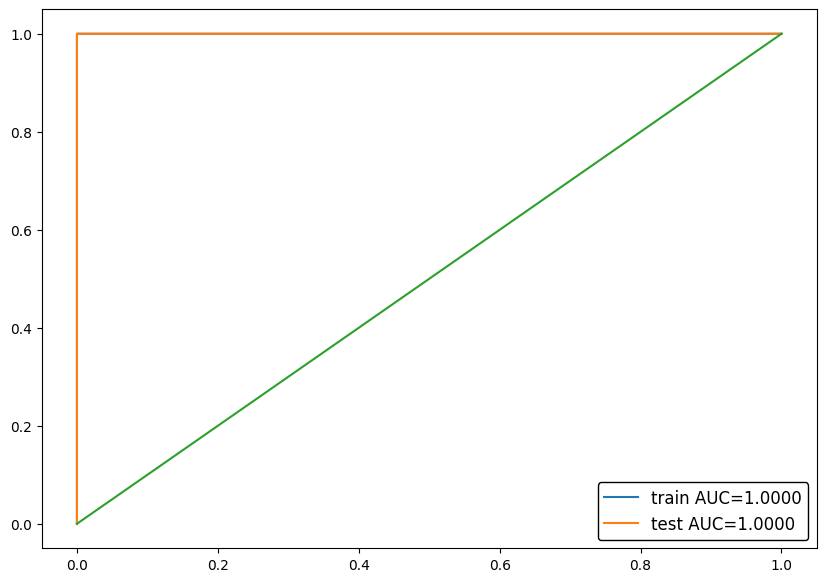

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

**Выводы:** 
1. По метрике Recall модель показала идеальные результаты (1.0 на train и 1.0 на test).
2. По метрике ROC-AUC модель также показала отличные результаты (1.0 на train и 1.0 на test).
3. Нет признаков недообучения или переобучения модели.

# Оценка времени работы моделей

## Decision Tree

In [ ]:
%%time
# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(StandardScaler())

# конвейер подготовки данных 
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_cols),
    ],
    remainder="passthrough",
    verbose_feature_names_out = False,
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', tree.DecisionTreeClassifier(random_state=seed)) # алгоритм
])

parameters = {
    # название этапа подготовки__гиперпараметр: [сетка (список) параметров]
    "alg__max_depth": [20],
    "alg__criterion": ['gini']
}

# сетка гиперпараметров
gs = GridSearchCV(alg, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  scoring='recall',
                  return_train_score=True,
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=-1) # параллелизм вычислений

gs.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: user 150 ms, sys: 40.6 ms, total: 191 ms
Wall time: 2.67 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('enc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'avg_glucose_level',
                                                                          'bmi'])],
                                                          verbose_feature_names_out=False)),
                                       ('alg',
                                        DecisionTreeClassifier(random_state=17))]),
             n_jobs=-1,
             param_grid={'alg__criterion': ['gini'], 'alg__max_depth': [20]},
             return_train_score=True, scoring='recall', verbose=2)

## XGBoost

In [ ]:
%%time
# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(StandardScaler())

# конвейер подготовки данных 
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_cols),
        ('ohe',
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            cat_cols
        )
    ],
    verbose_feature_names_out = False,
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', xgboost.XGBClassifier(random_state=seed)) # алгоритм
])

parameters = {
    # название этапа подготовки__гиперпараметр: [сетка (список) параметров]
    "alg__max_depth": [6]
}

# сетка гиперпараметров
gs = GridSearchCV(alg, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  scoring='recall',
                  return_train_score=True,
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=-1) # параллелизм вычислений

gs.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


CPU times: user 7.9 s, sys: 32.5 ms, total: 7.93 s
Wall time: 24.8 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('enc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['sex',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status'])],
                                                          verbose_fe...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=17, ...))]),
             n_jobs=-1, param_grid={'alg__max_depth': [6]},
             return_train_score=True, scoring='recall', verbose=2)

# Выбор модели

1. Качество работы Decision Tree по метрике Recall составляет 1.0 на train и 0.9989 на test, а XGBoost - 1.0 и на train, и на test.
2. Качество работы Decision Tree по метрике Roc-AUC составляет 0.9991 на train и 0.9975 на test, а XGBoost - 1.0 и на train, и на test.
3. Время обучения Decision Tree намного меньше (2,67 сек) по сравнению с XGBoost (24,8 сек).
4. Поскольку разница в качестве незначительная (0.1% по Recall, 0,1-0,25% по ROC-AUC), а время работы **Decision Tree** выше + не требуется дополнительная обработка категориальных признаков, то остановимся на выборе данной модели.

# Deep Learning

Попробуем развернуть полносвязную нейронную сеть с помощью PyTorch, перед этим пробразовав данные в тензоры и разделив их на батчи размером 200 (при создании DataLoader перемешаем наблюдения на тренировочном датасете). В качестве скора используем recall из torchmetrics

## Подготовка датасета

In [ ]:
!pip install torchmetrics

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader

import torchmetrics
from torchmetrics.classification import BinaryRecall

In [ ]:
# перевод DataFrame в numpy
X_train_n = X_train.to_numpy()
y_train_n = y_train.to_numpy()
X_test_n = X_test.to_numpy()
y_test_n = y_test.to_numpy()

In [ ]:
# перевод в тензоры
X_train_t =  torch.tensor(X_train_n, dtype=torch.float32)
y_train_t =  torch.tensor(y_train_n, dtype=torch.long)
X_val_t =  torch.tensor(X_test_n, dtype=torch.float32)
y_val_t =  torch.tensor(y_test_n, dtype=torch.long)

In [ ]:
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)

In [ ]:
len(X_train)

30647

In [ ]:
batch_size = 200
train_dataloader =  DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
valid_dataloader =  DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

## Полносвязная нейронная сеть

Развернута полносвязная сеть, состоящая из входного слоя, трех скрытых слоев и выходного слоя.
<br>Количество нейронов подобрано опытным путем в результате нескольких тестов.
<br>Добавлена оптимизация с помощью BatchNorm1d в каждом слое.
<br>В качестве функции активации используется сигмоида. 
<br>В качестве критерия используется кросс-энтропия.
<br>В качестве оптимизатора выбран Adam с учетом регуляризации по весам, а также изменяемой скорости обучения - ExponentialLR.
<br>Модель обучена на 30 эпохах

In [ ]:
activation = nn.Sigmoid

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(1*10,500),
    nn.BatchNorm1d(500),
    activation(),
    nn.Linear(500,300),
    nn.BatchNorm1d(300),
    activation(),
    nn.Linear(300,200),
    nn.BatchNorm1d(200),
    activation(),
    nn.Linear(200,100),
    nn.BatchNorm1d(100),
    activation(),
    nn.Linear(100,2)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.5)
recall = BinaryRecall()

loaders = {"train": train_dataloader, "valid": valid_dataloader}

In [ ]:
max_epochs = 30
recall_lst = {"train": [], "valid": []}
for epoch in range(max_epochs):# итерируемся по датасету
    for k, dataloader in loaders.items(): #несколько dataloader для train / valid / test
        epoch_rec = 0
        epoch_all = 0
        for x_batch, y_batch in dataloader: # итерируемся по датасету
            if k == "train":
                 model.train() # переводим модель в режим train
                 optimizer.zero_grad() # обнуляем градиенты модели
                 outp = model(x_batch)
            else:
                 model.eval() # переводим модель в режим eval
                 with torch.no_grad(): # НЕ считаем градиенты
                   outp = model(x_batch) # получаем "логиты" из модели
            preds = outp.argmax(-1) # считаем метрики
            rec =  recall(preds, y_batch).float()
            all = 1
            epoch_rec += rec
            epoch_all += all
            if k == "train":
                loss = criterion(outp, y_batch) # считаем "лосс" для логистической регрессии
                loss.backward() # считаем градиенты
                optimizer.step() # делаем шаг градиентного спуска
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Recall: {epoch_rec/epoch_all}")
        recall_lst[k].append(epoch_rec/epoch_all) # записываем результаты в список по train/valid

        scheduler.step() # делаем шаг с учетом ExpLR

Epoch: 1
Loader: train. Recall: 0.6034876704216003
Loader: valid. Recall: 0.46663936972618103
Epoch: 2
Loader: train. Recall: 0.6460655927658081
Loader: valid. Recall: 0.6531059741973877
Epoch: 3
Loader: train. Recall: 0.6510528326034546
Loader: valid. Recall: 0.6679581999778748
Epoch: 4
Loader: train. Recall: 0.6501847505569458
Loader: valid. Recall: 0.6637765765190125
Epoch: 5
Loader: train. Recall: 0.6509566903114319
Loader: valid. Recall: 0.6558908820152283
Epoch: 6
Loader: train. Recall: 0.6494704484939575
Loader: valid. Recall: 0.6656099557876587
Epoch: 7
Loader: train. Recall: 0.6511778831481934
Loader: valid. Recall: 0.6690471172332764
Epoch: 8
Loader: train. Recall: 0.6502251029014587
Loader: valid. Recall: 0.6658527851104736
Epoch: 9
Loader: train. Recall: 0.6507456302642822
Loader: valid. Recall: 0.658586323261261
Epoch: 10
Loader: train. Recall: 0.6511585116386414
Loader: valid. Recall: 0.6479715704917908
Epoch: 11
Loader: train. Recall: 0.6504992842674255
Loader: valid. Re

**Выводы:** при обучении на 30 эпохах с учетом примененных оптимизаций удалось достичь качества по Recall: 0.6514 на train и 0.6459 на test. Модель недообучилась. Качество метрики растет медленно.

## Тестирование различных функций активации

Тестирование модели на различных функциях активации: Sigmoid, ReLu, LeakyReLu

In [ ]:
def test_activation_function(activation):
    model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(1*10,500),
    nn.BatchNorm1d(500),
    activation(),
    nn.Linear(500,300),
    nn.BatchNorm1d(300),
    activation(),
    nn.Linear(300,200),
    nn.BatchNorm1d(200),
    activation(),
    nn.Linear(200,100),
    nn.BatchNorm1d(100),
    activation(),
    nn.Linear(100,2)
    )

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.5)
    recall = BinaryRecall()

    loaders = {"train": train_dataloader, "valid": valid_dataloader}
    max_epochs = 30
    recall_lst = {"train": [], "valid": []}
    for epoch in range(max_epochs):
        for k, dataloader in loaders.items():
            epoch_rec = 0
            epoch_all = 0
            for x_batch, y_batch in dataloader:
                if k == "train":
                    model.train()
                    optimizer.zero_grad()
                    outp = model(x_batch)
                else:
                    model.eval()
                    with torch.no_grad():
                      outp = model(x_batch)
                preds = outp.argmax(-1)
                rec =  recall(preds, y_batch).float()
                all = 1
                epoch_rec += rec
                epoch_all += all
                if k == "train":
                    loss = criterion(outp, y_batch)
                    loss.backward()
                    optimizer.step()
            if k == "train":
                print(f"Epoch: {epoch+1}")
            print(f"Loader: {k}. Recall: {epoch_rec/epoch_all}")
            recall_lst[k].append(epoch_rec/epoch_all)

            scheduler.step()
    return recall_lst["valid"]

In [ ]:
# тестирование: Sigmoid, ReLu, LeakyReLu
sigmoid_recall = test_activation_function(nn.Sigmoid)
relu_recall = test_activation_function(nn.ReLU)
leaky_relu_recall = test_activation_function(nn.LeakyReLU)

Epoch: 1
Loader: train. Recall: 0.6134431958198547
Loader: valid. Recall: 0.5055214166641235
Epoch: 2
Loader: train. Recall: 0.6534456014633179
Loader: valid. Recall: 0.7012003660202026
Epoch: 3
Loader: train. Recall: 0.6487579941749573
Loader: valid. Recall: 0.6446717977523804
Epoch: 4
Loader: train. Recall: 0.649944007396698
Loader: valid. Recall: 0.6864843964576721
Epoch: 5
Loader: train. Recall: 0.6519989371299744
Loader: valid. Recall: 0.6596881747245789
Epoch: 6
Loader: train. Recall: 0.648456871509552
Loader: valid. Recall: 0.6626070141792297
Epoch: 7
Loader: train. Recall: 0.6474977731704712
Loader: valid. Recall: 0.6661807894706726
Epoch: 8
Loader: train. Recall: 0.648468017578125
Loader: valid. Recall: 0.6499709486961365
Epoch: 9
Loader: train. Recall: 0.6488320827484131
Loader: valid. Recall: 0.6640472412109375
Epoch: 10
Loader: train. Recall: 0.6498208045959473
Loader: valid. Recall: 0.6586200594902039
Epoch: 11
Loader: train. Recall: 0.6480766534805298
Loader: valid. Recal

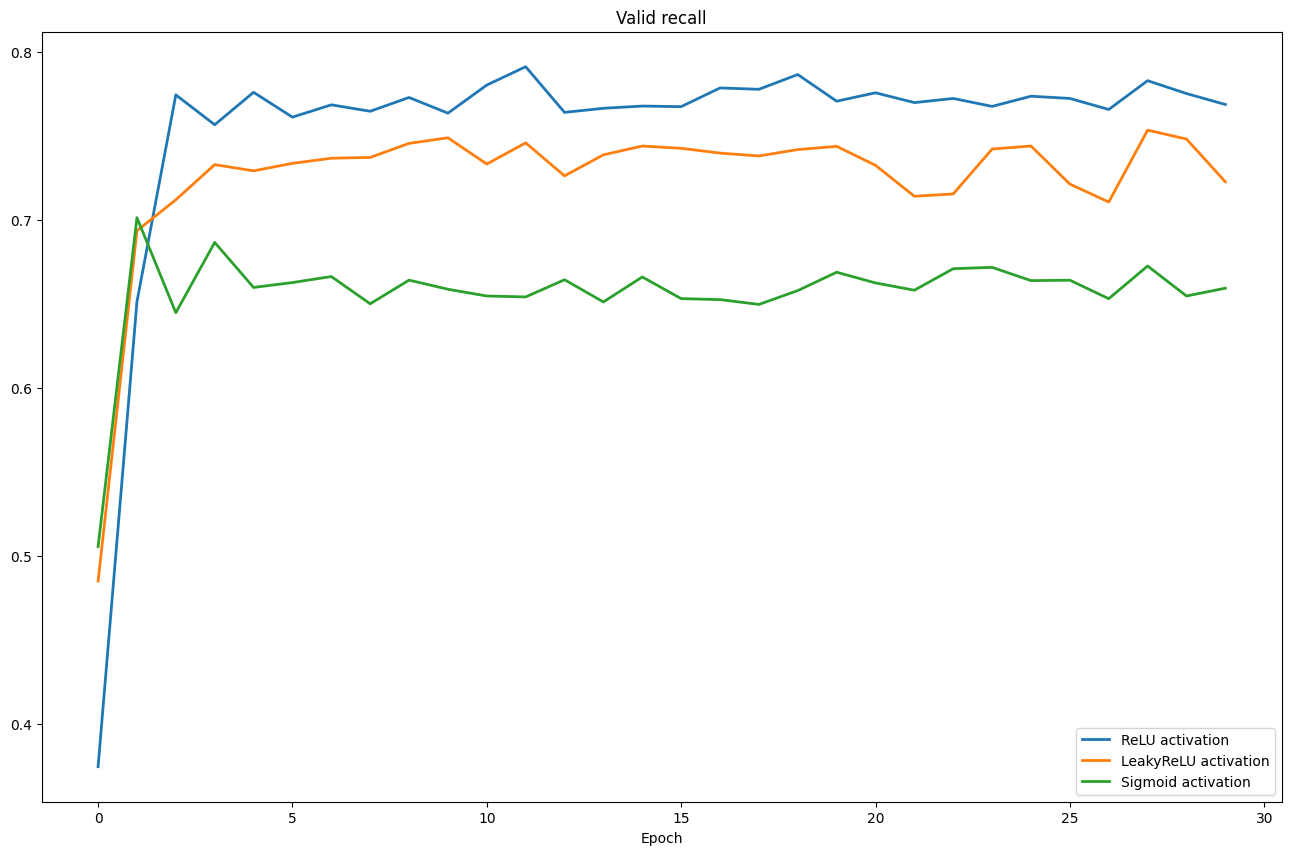

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Valid recall")
plt.plot(range(max_epochs), relu_recall, label="ReLU activation", linewidth=2)
plt.plot(range(max_epochs), leaky_relu_recall, label="LeakyReLU activation", linewidth=2)
plt.plot(range(max_epochs), sigmoid_recall, label="Sigmoid activation", linewidth=2)
plt.legend()
plt.xlabel("Epoch")
plt.show()

**Выводы:** лучше всего отработала модель с активацией ReLU

## Увеличение эпох для лучшей модели

Тестирование модели с учетом активации ReLu на 100 эпохах

In [ ]:
activation = nn.ReLU

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(1*10,500),
    nn.BatchNorm1d(500),
    activation(),
    nn.Linear(500,300),
    nn.BatchNorm1d(300),
    activation(),
    nn.Linear(300,200),
    nn.BatchNorm1d(200),
    activation(),
    nn.Linear(200,100),
    nn.BatchNorm1d(100),
    activation(),
    nn.Linear(100,2)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.5)
recall = BinaryRecall()

loaders = {"train": train_dataloader, "valid": valid_dataloader}

In [ ]:
max_epochs = 100
recall_lst = {"train": [], "valid": []}
for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
        epoch_rec = 0
        epoch_all = 0
        for x_batch, y_batch in dataloader:
            if k == "train":
                 model.train()
                 optimizer.zero_grad()
                 outp = model(x_batch)
            else:
                 model.eval()
                 with torch.no_grad():
                   outp = model(x_batch)
            preds = outp.argmax(-1)
            rec =  recall(preds, y_batch).float()
            all = 1
            epoch_rec += rec
            epoch_all += all
            if k == "train":
                loss = criterion(outp, y_batch)
                loss.backward()
                optimizer.step()
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Recall: {epoch_rec/epoch_all}")
        recall_lst[k].append(epoch_rec/epoch_all)

        scheduler.step()

Epoch: 1
Loader: train. Recall: 0.5558793544769287
Loader: valid. Recall: 0.4757360517978668
Epoch: 2
Loader: train. Recall: 0.7214364409446716
Loader: valid. Recall: 0.6893091797828674
Epoch: 3
Loader: train. Recall: 0.7351290583610535
Loader: valid. Recall: 0.8178275227546692
Epoch: 4
Loader: train. Recall: 0.780342698097229
Loader: valid. Recall: 0.76483154296875
Epoch: 5
Loader: train. Recall: 0.7770312428474426
Loader: valid. Recall: 0.8017928600311279
Epoch: 6
Loader: train. Recall: 0.7813153862953186
Loader: valid. Recall: 0.7872991561889648
Epoch: 7
Loader: train. Recall: 0.784496545791626
Loader: valid. Recall: 0.7884480953216553
Epoch: 8
Loader: train. Recall: 0.7842146158218384
Loader: valid. Recall: 0.7900758385658264
Epoch: 9
Loader: train. Recall: 0.7818307876586914
Loader: valid. Recall: 0.7780892848968506
Epoch: 10
Loader: train. Recall: 0.784319281578064
Loader: valid. Recall: 0.787585973739624
Epoch: 11
Loader: train. Recall: 0.7834738492965698
Loader: valid. Recall: 

In [ ]:
model.eval()
y_train_pred = model(X_train_t).max(1).indices.detach().numpy()
y_val_pred = model(X_val_t).max(1).indices.detach().numpy()

In [ ]:
train_recall = recall_score(y_train_n, y_train_pred)
test_recall = recall_score(y_test_n, y_val_pred)

In [ ]:
f'Recall на train: {round(train_recall, 4)}, Recall на test: {round(test_recall, 4)}'

'Recall на train: 0.7865, Recall на test: 0.7826'

In [ ]:
y_train_predicted = model(X_train_t)[:, 1].detach().numpy()
y_test_predicted = model(X_val_t)[:, 1].detach().numpy()

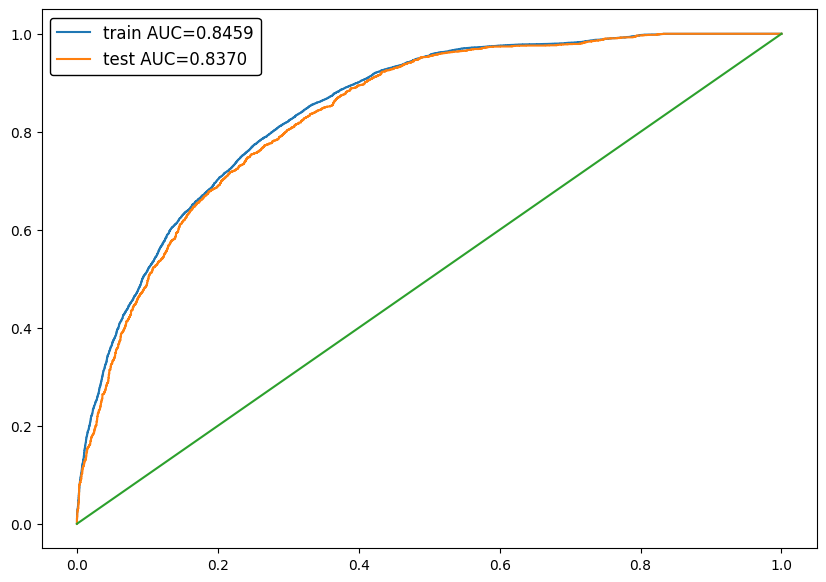

In [ ]:
train_auc = roc_auc_score(y_train_n, y_train_predicted)
test_auc = roc_auc_score(y_test_n, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

**Выводы:** 
1. По метрике Recall модель логистической регрессии показала неплохие результаты (0.7865 на train и 0.7826 на test).
2. По метрике ROC-AUC модель также показала неплохие результаты (0.8459 на train и 0.8370 на test).
3. На 100 эпохах модель не дообучилась, но обучение очень медленное (показатели растут медленно).
4. Возможно, необходимо выбрать иную архитектуру, либо выполнить дополнительную оптимизацию параметров.